The experimental eccentricities were [0.97133588 0.83966938 0.35499408 0.78609912 0.95889462 0.99702517
 0.99835965 0.97872699 0.89040476 0.61944419 0.69064867 0.92014198
 0.97457293]

The expected eccentricities were [0.9634330440022852, 0.816496580927726, 1.4901161193847656e-08, 0.8164965809277259, 0.9634330440022852, 1.0, 1.0, 0.9912959295180228, 0.9101797211244547, 0.6412560280567633, 0.6412560280567634, 0.9101797211244547, 0.9912959295180227]

The uncertainties in the expected eccentricities were [0.014715184768313396, 0.04654211338651544, 6625707.263662003, 0.04654211338651548, 0.014715184768313396, 3.0227568717789067e-18, 0.0, 0.0066697723100525436, 0.026320178406901915, 0.09385081846445201, 0.09385081846445197, 0.026320178406901915, 0.006669772310052552]
[ 18.38488043  32.59160835  41.97574667 -28.58725612 -11.58309365
   4.31211646   2.80008406  10.57856923  23.80924583  42.25692179
 -38.11472169 -18.28195313 -11.24471345]


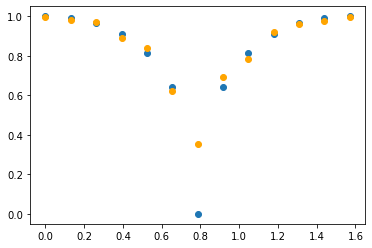


0.8567167767881237
0.9716999411186932



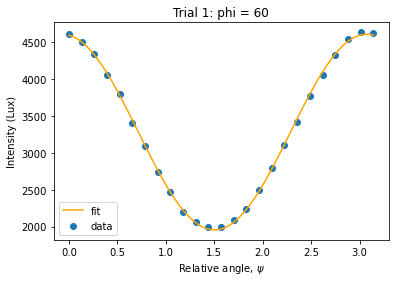

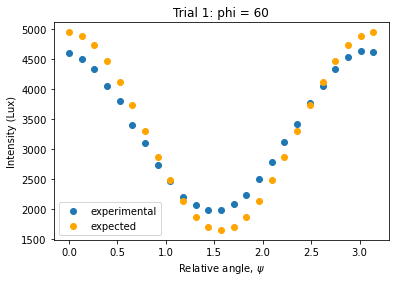

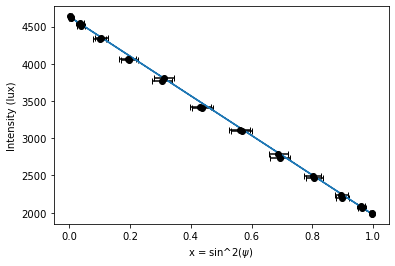

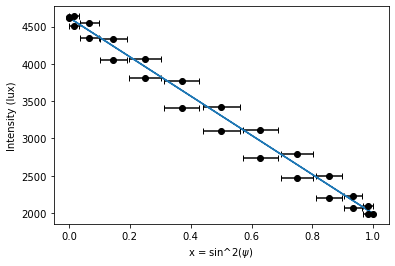

For trial 1, e =  0.7544959259317563  while we expected that e = 0.8164965809277259
For trial 1, total intensity of the light is  6609.999925660537 when we expect it to be 6602.0

For trial 2, e =  0.980399598947247  while we expected that e = 0.9912959295180227
For trial 2, total intensity of the light is  5512.999919981459 when we expect it to be 5423.0

For trial 3, e =  0.9060815200713311  while we expected that e = 0.9101797211244547
For trial 3, total intensity of the light is  5129.899954932258 when we expect it to be 5200.9

For trial 4, e =  0.6374916966717574  while we expected that e = 0.6412560280567634
For trial 4, total intensity of the light is  4958.499853096132 when we expect it to be 4962.0

[0.04654211 0.00666977 0.02632018 0.09385082]


In [2]:
# analysis not complete for either experiment. I do not account for experimental uncertanties (like at all) and 
# to complete the analysis involves much error propogation I have not done yet. This is 
# just a preliminary analysis to make sure everything looks good.

# import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.optimize as opt

# define a bunch of useful functions
# define covaraince function

def covariance(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    some = 0
    N = len(x)
    for i in range(0,N):
        some+=(x[i]-x_mean)*(y[i]-y_mean)
    return 1/(N-1)*some

# define correlation_coefficient function

def correlation_coefficient(x,y):
    covar_xy = covariance(x,y)
    sigma_x=np.sqrt(covariance(x,x))
    sigma_y = np.sqrt(covariance(y,y))
    return covar_xy/sigma_x/sigma_y

# define simple linear fit function

def simple_linear_fit(x, y):
    N = len(x)
    dell = N*np.sum(x**2)-np.sum(x)**2
    m = (N*np.sum(x*y)-np.sum(x)*np.sum(y))/dell
    c = (np.sum(x**2)*np.sum(y)-np.sum(x)*np.sum(x*y))/dell
    err_cu = np.sqrt(1/(N-2)*np.sum((y-m*x-c)**2))
    err_m = err_cu*np.sqrt(N/dell)
    err_c = err_cu*np.sqrt(np.sum(x**2)/dell)
    return m, err_m, c, err_c

# define wighted linear fit function

def weighted_linear_fit(x, y, err):
    weights = 1/err**2
    dell = np.sum(weights)*np.sum(weights*x**2)-(np.sum(weights*x))**2
    m = (np.sum(weights)*np.sum(weights*x*y)-np.sum(weights*x)*np.sum(weights*y))/dell
    b=(np.sum(weights*y)-m*np.sum(weights*x))/np.sum(weights)
    err_m = np.sqrt(np.sum(weights)/dell)
    err_b = np.sqrt(np.sum(weights*x**2)/dell)
    return m, err_m, b, err_b

# define function to find the reduced chi-squared of a weighted fit

def chisq(y, y_expected, err):
    weights = 1/err**2
    return np.sum(weights*(y-y_expected)**2)


# experiment 1

# import data from spreadsheet

phi = np.array([15, 30, 45, 60, 75, 90, 0, 7.5, 22.5, 37.5, 52.5, 67.5, 82.5]) * np.pi/180#, 48.75, 41.25])

I_0 = np.array([961.1, 2451, 3363, 2585, 754.2, 79.65, 39.43, 480.6, 1911, 3294, 3091, 1455, 285.6])#, 1446, 1301])
I_90 = np.array([5792, 3903, 3411, 4239, 6176, 6851, 6954, 6253, 4947, 3447, 3589, 5636, 3189])#, 1446, 1641])
I_45 = np.array([1592, 1724, 3327, 4734, 4597, 2866, 3063, 2130, 1504, 2601, 4351, 5011, 2299])#, 1416, 1147])
I_135 = np.array([5202, 4864, 3780, 2170, 2277, 3893, 3741, 4364, 4831, 4194, 2319, 1910, 1097])#, 1428, 1900])

# compute stoke's parameters

I = I_0 + I_90
Q = (I_0 - I_90)/I
U = (I_45 - I_135)/I

# determine experimental eccentricity and inclination

e = np.sqrt(2*np.sqrt(Q**2 + U**2)/(1+np.sqrt(Q**2 + U**2)))
theta = 1/2*np.arctan(U/Q) *180 / np.pi

# print expected values for the eccentricity and its error

e_expected = []
e_expected_err = []
for i in range(len(list(phi))):
    if abs(phi[i]) <= 45*np.pi/180:
        e_expected.append(np.sqrt(1-np.tan(phi[i])**2))
        e_expected_err.append((np.tan(phi[i])*1/np.cos(phi[i])**2)/np.sqrt(1-np.tan(phi[i])**2)*2*np.sqrt(2)*np.pi/180)
    else:
        e_expected.append(np.sqrt(1-1/np.tan(phi[i])**2))
        e_expected_err.append((1/np.tan(phi[i])*1/np.sin(phi[i])**2)/np.sqrt(1-1/np.tan(phi[i])**2)*2*np.sqrt(2)*np.pi/180)
        
# print out results
        
print("The experimental eccentricities were", e)
print("")
print("The expected eccentricities were", e_expected)
print("")
print("The uncertainties in the expected eccentricities were", e_expected_err)
print(theta)

# scatter plot of eccentricity data vs expected values

plt.scatter(phi, e_expected)
plt.scatter(phi, e, color = "orange")
plt.show()

print("")

# print r2 score for the whole dataset and the dataset excluding the 45 degree point

print(r2_score(e_expected, e))

x1 = e_expected[:2]
x1.extend(e_expected[3:])
x2 = list(e[:2])
x2.extend(e[3:])

print(r2_score(x1,x2))
print("")

# experiment 2

# define function for the intensity of the light for the curve_fit later

def intensity_function(x, m, b, p):
    return m*np.sin(x+p)**2+b

# import data from spreadsheet. Note, points where the derivative in error propogation is 0, we add a 0.01 so
# the error propogation does not error out

data = open("data/Physics 5CL Capstone Data - exp2.csv", "r")

I_trial_2, I_trial_3, I_trial_4 = np.loadtxt(data, delimiter=",", skiprows=1, usecols=(4, 6, 8), unpack=True)

phi_2 = np.array([60, 82.5, 67.5, 52.5])*np.pi/180
psi_2 = np.array([0.01, 7.5, 15, 22.5, 30, 37.5, 45, 52.5, 60, 67.5, 75, 82.5, 90.01, 97.5, 105, 112.5, 120, 127.5, 
                  135, 142.5, 150, 157.5, 165, 172.5, 180.01])*np.pi/180

# compute the expected eccentricities and their uncertainties and convert to arrays

e_2 = []
e_2_err = []
for i in range(len(list(phi_2))):
    if abs(phi_2[i]) <= 45*np.pi/180:
        e_2.append(np.sqrt(1-np.tan(phi_2[i])**2))
        e_2_err.append((np.tan(phi_2[i])*1/np.cos(phi_2[i])**2)/np.sqrt(1-np.tan(phi_2[i])**2)*2*np.sqrt(2)*np.pi/180)
    else:
        e_2.append(np.sqrt(1-1/np.tan(phi_2[i])**2))
        e_2_err.append((1/np.tan(phi_2[i])*1/np.sin(phi_2[i])**2)/np.sqrt(1-1/np.tan(phi_2[i])**2)*2*np.sqrt(2)*np.pi/180)
        
e_2 = np.array(e_2)
e_2_err = np.array(e_2_err)

# also importing data from csv since my code is not well organized

I_trial_1 = np.array([4612, 4512, 4341, 4055, 3805, 3407, 3095, 2736, 2463, 2203, 2063, 1987, 1990, 2087, 2233, 2493, 2789, 
                      3112, 3417, 3775, 4058, 4332, 4542, 4638, 4628])  

# compute the total intensity of the light

I_0_2 = np.array([I_trial_1[0], I_trial_2[0], I_trial_3[0], I_trial_4[0]])
I_90_2 = np.array([I_trial_1[12], I_trial_2[12], I_trial_3[12], I_trial_4[12]])
I_2 = I_0_2 + I_90_2

# compute the expected intensity to compare

I_expected_trial_1 = I_2[0]/(2-e_2[0]**2)*(1-e_2[0]**2*np.sin(psi_2)**2)
I_expected_trial_2 = I_2[1]/(2-e_2[1]**2)*(1-e_2[1]**2*np.sin(psi_2)**2)
I_expected_trial_3 = I_2[2]/(2-e_2[2]**2)*(1-e_2[2]**2*np.sin(psi_2)**2)
I_expected_trial_4 = I_2[3]/(2-e_2[3]**2)*(1-e_2[3]**2*np.sin(psi_2)**2)

# perform curve_fit fit to the first data set to determine a phase angle

par, cov = opt.curve_fit(intensity_function, psi_2, I_trial_1, p0 = [-2630, 4620, np.pi/60])
[m, b, p] = par

# display curve_fit fit vs data

plt.scatter(psi_2, I_trial_1, label = "data")
plt.plot(np.linspace(0, np.pi, 500), m*np.sin(np.linspace(0, np.pi, 500)+p)**2+b, color = "orange", label = "fit")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 1: phi = 60")
plt.show()

# graphs of data vs expected values.

plt.scatter(psi_2, I_trial_1, label = "experimental")
plt.scatter(psi_2, I_expected_trial_1, color = "orange", label = "expected")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 1: phi = 60")
plt.show()

"""plt.scatter(psi_2, I_trial_2, label = "experimental")
plt.scatter(psi_2, I_expected_trial_2, color = "orange", label = "expected")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 2: phi = 82.5")
plt.show()

plt.scatter(psi_2, I_trial_3, label = "experimental")
plt.scatter(psi_2, I_expected_trial_3, color = "orange", label = "expected")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 3: phi = 22.5")
plt.show()

plt.scatter(psi_2, I_trial_4, label = "experimental")
plt.scatter(psi_2, I_expected_trial_4, color = "orange", label = "expected")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 4: phi = 37.5")
plt.show()"""

# import error in psi

err_psi_2 = np.array([2*np.sqrt(3)*np.pi/180]*25)

# determine x = sin^2(psi) and its error

x = np.sin(psi_2)**2
err_x = 2*np.sin(psi_2)*np.cos(psi_2)*err_psi_2

# separately determine x for the first fit adjusting for the phase angle and its error

x_adjust_1 = np.sin(psi_2+p)**2
err_x_adjust_1 = 2*np.sin(psi_2+p)*np.cos(psi_2+p)*err_psi_2/np.sqrt(3)

"""plt.errorbar(x, I_trial_1, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.show()
plt.errorbar(x, I_trial_2, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.show()
plt.errorbar(x, I_trial_2, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.show()
plt.errorbar(x, I_trial_2, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.show()"""

# determine the initial parameters from the unweighted linear fit

initial_parameters_adjust_1 = np.array(simple_linear_fit(x_adjust_1, I_trial_1))

initial_parameters_1 = np.array(simple_linear_fit(x, I_trial_1))
initial_parameters_2 = np.array(simple_linear_fit(x, I_trial_2))
initial_parameters_3 = np.array(simple_linear_fit(x, I_trial_3))
initial_parameters_4 = np.array(simple_linear_fit(x, I_trial_4))

# determine the equivalent errors and adjust

err_equiv_adjust_1 = abs(initial_parameters_adjust_1[0])*err_x_adjust_1

err_equiv_1 = abs(initial_parameters_1[0])*err_x
err_equiv_2 = abs(initial_parameters_2[0])*err_x
err_equiv_3 = abs(initial_parameters_3[0])*err_x
err_equiv_4 = abs(initial_parameters_4[0])*err_x

# determine the final parameters from the weighted linear fit

final_parameters_adjust_1 = np.array(weighted_linear_fit(x_adjust_1, I_trial_1, err_equiv_adjust_1))

final_parameters_1 = np.array(weighted_linear_fit(x, I_trial_1, err_equiv_1))
final_parameters_2 = np.array(weighted_linear_fit(x, I_trial_2, err_equiv_2))
final_parameters_3 = np.array(weighted_linear_fit(x, I_trial_3, err_equiv_3))
final_parameters_4 = np.array(weighted_linear_fit(x, I_trial_4, err_equiv_4))

# graphs of final weighted linear fits

plt.errorbar(x_adjust_1, I_trial_1, xerr = err_x_adjust_1, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x_adjust_1, final_parameters_adjust_1[0]*x_adjust_1+final_parameters_adjust_1[2], label = "linear fit")
plt.xlabel("x = sin^2($\psi$)")
plt.ylabel("Intensity (lux)")
plt.show()

plt.errorbar(x, I_trial_1, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x, final_parameters_1[0]*x+final_parameters_1[2], label = "linear fit")
plt.xlabel("x = sin^2($\psi$)")
plt.ylabel("Intensity (lux)")
plt.show()

"""plt.errorbar(x, I_trial_2, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x, final_parameters_2[0]*x+final_parameters_2[2], label = "linear fit")
plt.show()

plt.errorbar(x, I_trial_3, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x, final_parameters_3[0]*x+final_parameters_3[2], label = "linear fit")
plt.show()

plt.errorbar(x, I_trial_4, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x, final_parameters_4[0]*x+final_parameters_4[2], label = "linear fit")
plt.show()"""

# determine the eccentricity, e from the fit parameters (without error for now)

e_exp_trial_1 = np.sqrt(-final_parameters_1[0]/final_parameters_1[2])
e_exp_trial_2 = np.sqrt(-final_parameters_2[0]/final_parameters_2[2])
e_exp_trial_3 = np.sqrt(-final_parameters_3[0]/final_parameters_3[2])
e_exp_trial_4 = np.sqrt(-final_parameters_4[0]/final_parameters_4[2])

# determine the total intensity, I from the fit parameters (without error for now)

total_I_trial_1 = final_parameters_1[2]*(2-e_exp_trial_1**2)
total_I_trial_2 = final_parameters_2[2]*(2-e_exp_trial_2**2)
total_I_trial_3 = final_parameters_3[2]*(2-e_exp_trial_3**2)
total_I_trial_4 = final_parameters_4[2]*(2-e_exp_trial_4**2)

# print e and I (both experimental and expected) for sake of comparison

print("For trial 1, e = ", e_exp_trial_1, " while we expected that e =", e_2[0])
print("For trial 1, total intensity of the light is ", total_I_trial_1, "when we expect it to be", I_2[0])
print("")

print("For trial 2, e = ", e_exp_trial_2, " while we expected that e =", e_2[1])
print("For trial 2, total intensity of the light is ", total_I_trial_2, "when we expect it to be", I_2[1])
print("")

print("For trial 3, e = ", e_exp_trial_3, " while we expected that e =", e_2[2])
print("For trial 3, total intensity of the light is ", total_I_trial_3, "when we expect it to be", I_2[2])
print("")

print("For trial 4, e = ", e_exp_trial_4, " while we expected that e =", e_2[3])
print("For trial 4, total intensity of the light is ", total_I_trial_4, "when we expect it to be", I_2[3])
print("")

# print the uncertainty in expected eccentricity.

print(e_2_err)